In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
from sklearn.model_selection import train_test_split

1. csv 로드
2. EDA
    - info, describe, head
3. standard scaler
4. multi_collinear 
5. linear regression
6. 평가 
    - MSE
    - R-square
7. Algorithm 변경
    - Random Forest
    - XGboost

In [3]:
boston = pd.read_csv('../datasets/boston/Boston.csv')

In [4]:
# EDA

boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [6]:
boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

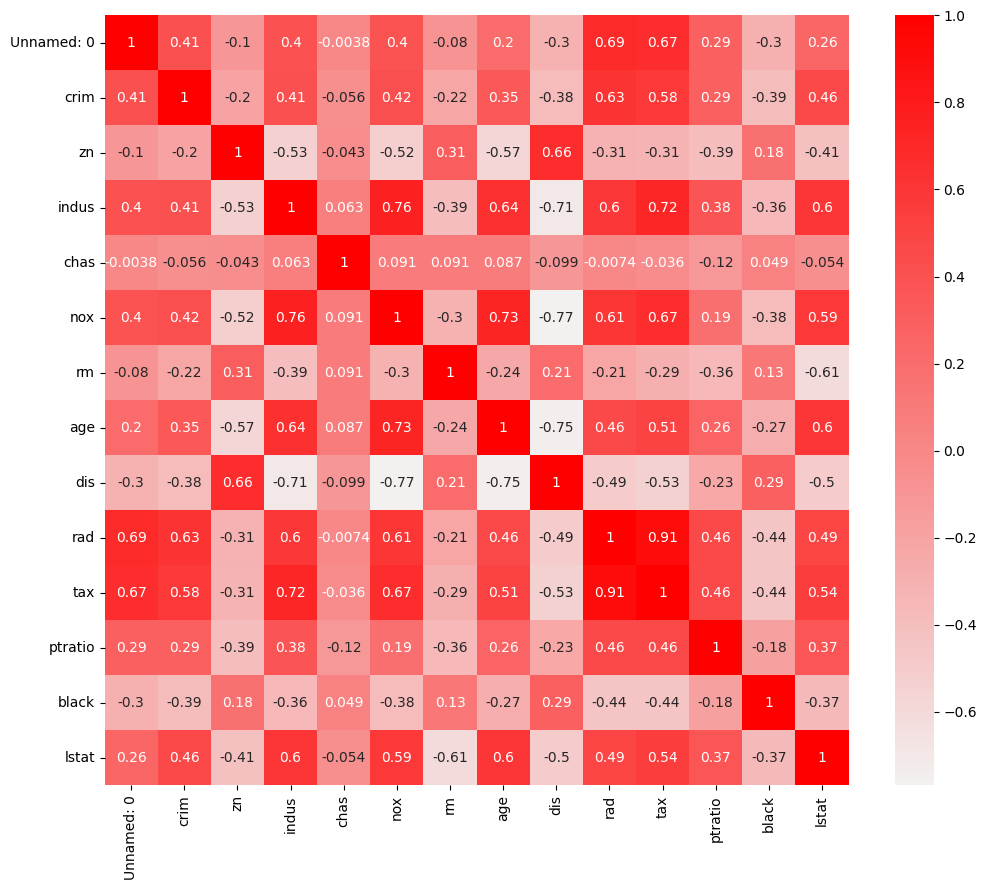

In [25]:
y_target=boston['medv']
X_data= boston.drop('medv',axis=1)

scaler=StandardScaler()
scaler.fit(X_data)
X_data_scaler= scaler.transform(X_data)                                   ## X_data standardScaling

boston_df_scaler=pd.DataFrame(data=X_data_scaler, columns=X_data.columns)
plt.figure(figsize=(12, 10))                                              ## boston_df_scaler이라는 새로운 데이터 프레임
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(boston_df_scaler.corr(), annot=True, cmap=cmap)
plt.show()

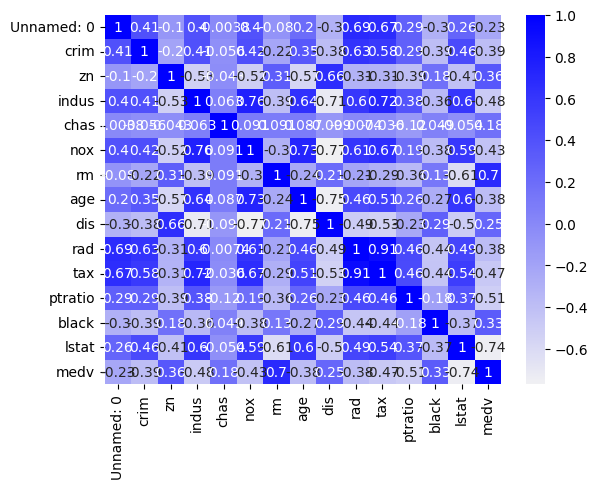

In [17]:
# Multi-collinear 

boston.corr()
cmap = sns.light_palette("blue", as_cmap=True)
sns.heatmap(boston.corr(), annot=True, cmap=cmap)
plt.show()

In [20]:
# Linear Regression 학습 위한 df 형태 조정

boston_data = boston.drop('medv', axis=1)
boston_target = boston['medv']

In [31]:
# Linear Regression
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(boston_data, boston_target, test_size= 0.2, random_state=0)

# linear regression model 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Linear Regression 평가 w/ MSE & R-square

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f} RMSE : {rmse:.3f}')
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_pred)))

MSE : 33.267 RMSE : 5.768
Variance score : 0.591


In [28]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestRegressor(random_state=0, n_jobs=-1)
rf_clf.fit(X_train,y_train)
y_preds2=rf_clf.predict(X_test)

mse= mean_squared_error(y_test,y_preds2)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds2):.3f}")


MSE : 7.874, RMSE:2.806
Variance score:0.907


In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gb_clf= GradientBoostingRegressor(random_state=0)
gb_clf.fit(X_train,y_train)
y_preds3 = gb_clf.predict(X_test)

mse= mean_squared_error(y_test,y_preds3)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds3):.3f}")

MSE : 6.726, RMSE:2.594
Variance score:0.920


In [30]:
import xgboost as xgb ## XGBoost 불러오기

import xgboost as xgb
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,y_train)
pred_probs = model.predict(X_test)

mse= mean_squared_error(y_test,pred_probs)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,pred_probs):.3f}")

MSE : 7.079, RMSE:2.661
Variance score:0.916


## Try

- GridSearchCV
- CrossValidation